In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
df =  pd.DataFrame()

for i in np.arange(0.75, 3.5,0.1):
    first = 3*np.sin(np.arange(0,20,0.1)/6.28) 
    second = 3*np.sin(np.arange(0,20,0.1)/6.28)+0.5 
    third = 3*np.sin(np.arange(0,20,0.1)/6.28)+0.65 

    rolling = pd.DataFrame()
    elevation = np.full(200, i) #+np.random.rand(200)/100
    first = np.where(first > elevation, elevation, first)
    second = np.where(second > elevation, elevation, second)
    third = np.where(third > elevation, elevation, third)

    rolling['elevation'] = elevation
    rolling['third'] = third
    rolling['second'] = second
    rolling['firsts'] = first
    df = pd.concat((df, rolling))

In [91]:
angular_thicknesses = df.T.diff(axis=0).abs().T
angular_thicknesses['mean'] = angular_thicknesses.copy().mean(axis=1)
angular_thicknesses['third_lag'] = angular_thicknesses.third.shift(1)
angular_thicknesses['second_lag'] = angular_thicknesses.second.shift(1)
angular_thicknesses['first_lag'] =angular_thicknesses.firsts.shift(1)
angular_thicknesses['first_log'] =angular_thicknesses.firsts.apply(np.log)
angular_thicknesses['second_log'] =angular_thicknesses.second.apply(np.log)
angular_thicknesses['third_log'] =angular_thicknesses.third.apply(np.log)

angular_thicknesses = angular_thicknesses.drop(columns=['elevation']).dropna().replace(-np.inf, 0)


In [92]:
df_onlap = pd.DataFrame()
for i in np.arange(0.75, 3.5, 0.1):
    
    elevation = np.full(200, i) #+np.random.rand(200)/100
    onlap_first = np.where(3*np.sin(np.arange(0,20,0.1)/6.28) > elevation, elevation, 3*np.sin(np.arange(0,20,0.1)/6.28))
    onlap_second = np.where(np.where(np.full(200,1.5) > onlap_first, np.full(200,0.5), onlap_first) > elevation, elevation, np.where(np.full(200,0.5) > onlap_first, np.full(200,0.5), onlap_first))
    onlap_third = np.where(np.where(np.full(200,1.65) > onlap_first, np.full(200,0.65), onlap_first) > elevation, elevation, np.where(np.full(200,0.65) > onlap_first, np.full(200,0.65), onlap_first))
    rolling_onlap = pd.DataFrame()
    rolling_onlap['elevation'] = elevation
    rolling_onlap['third'] = onlap_third
    rolling_onlap['second'] = onlap_second
    rolling_onlap['firsts'] = onlap_first
    df_onlap = pd.concat((df, rolling_onlap))


In [93]:
onlap_thicknesses = df_onlap.T.diff(axis=0).abs().T
onlap_thicknesses['mean'] = onlap_thicknesses.copy().mean(axis=1)
onlap_thicknesses['third_lag'] = onlap_thicknesses.third.shift(1)
onlap_thicknesses['second_lag'] = onlap_thicknesses.second.shift(1)
onlap_thicknesses['first_lag'] =onlap_thicknesses.firsts.shift(1)

onlap_thicknesses['first_log'] =onlap_thicknesses.firsts.apply(np.log)
onlap_thicknesses['second_log'] =onlap_thicknesses.second.apply(np.log)
onlap_thicknesses['third_log'] =onlap_thicknesses.third.apply(np.log)

onlap_thicknesses = onlap_thicknesses.drop(columns=['elevation']).dropna().replace(-np.inf, 0)


In [94]:

df_horizontal = pd.DataFrame()

for i in np.arange(0.75, 3.5, 0.1):
    horizontal_first = np.full(200, 0)+np.random.rand(200)/10
    horizontal_second = np.full(200, 1.5)+np.random.rand(200)/10
    horizontal_third = np.full(200,1.65)+np.random.rand(200)/10

    rolling_horiz =  pd.DataFrame()
    rolling_horiz['elevation'] = elevation
    rolling_horiz['third'] = horizontal_third
    rolling_horiz['second'] = horizontal_second
    rolling_horiz['firsts'] = horizontal_first
    df_horiz = pd.concat((df, rolling_horiz))



In [95]:

horizontal_thicknesses = df_horiz.T.diff(axis=0).abs().T
horizontal_thicknesses['mean'] = horizontal_thicknesses.copy().mean(axis=1)
horizontal_thicknesses['third_lag'] = horizontal_thicknesses.third.shift(1)
horizontal_thicknesses['second_lag'] = horizontal_thicknesses.second.shift(1)
horizontal_thicknesses['first_lag'] =horizontal_thicknesses.firsts.shift(1)

horizontal_thicknesses['first_log'] =horizontal_thicknesses.firsts.apply(np.log)
horizontal_thicknesses['second_log'] =horizontal_thicknesses.second.apply(np.log)
horizontal_thicknesses['third_log'] =horizontal_thicknesses.third.apply(np.log)

horizontal_thicknesses = horizontal_thicknesses.drop(columns=['elevation']).dropna().replace(-np.inf, 0)


In [96]:
normalized_df=(angular_thicknesses-angular_thicknesses.min())/(angular_thicknesses.max()-angular_thicknesses.min())
normalized_dfo=(onlap_thicknesses-onlap_thicknesses.min())/(onlap_thicknesses.max()-onlap_thicknesses.min())
normalized_dfh=(horizontal_thicknesses-horizontal_thicknesses.min())/(horizontal_thicknesses.max()-horizontal_thicknesses.min())

normalized_dfo['class'] = 1
normalized_df['class'] = 0
normalized_dfh['class'] = 2

In [97]:
dataset = pd.concat((normalized_df, normalized_dfo, normalized_dfh))

In [98]:
dataset

,third,second,firsts,mean,third_lag,second_lag,first_lag,first_log,second_log,third_log,class
1,0.018126,1.000000,1.000000,0.198843,0.035288,1.000000,1.000000,0.919916,0.780812,0.525546,0
2,0.001553,1.000000,1.000000,0.185321,0.018431,1.000000,1.000000,0.919916,0.780812,0.234842,0
3,0.000000,0.711616,1.000000,0.171805,0.001579,1.000000,1.000000,0.919916,0.741504,0.874793,0
4,0.000000,0.393642,1.000000,0.158299,0.000000,0.711616,1.000000,0.919916,0.673095,0.874793,0
5,0.000000,0.075992,1.000000,0.144807,0.000000,0.393642,1.000000,0.919916,0.483058,0.874793,0
6,0.000000,0.000000,0.927623,0.131333,0.000000,0.075992,1.000000,0.911235,1.000000,0.874793,0
7,0.000000,0.000000,0.832594,0.117878,0.000000,0.000000,0.927623,0.898748,1.000000,0.874793,0
8,0.000000,0.000000,0.737734,0.104448,0.000000,0.000000,0.832594,0.884773,1.000000,0.874793,0
9,0.000000,0.000000,0.643068,0.091045,0.000000,0.000000,0.737734,0.868905,1.000000,0.874793,0
10,0.000000,0.000000,0.548618,0.077673,0.000000,0.000000,0.643068,0.850553,1.000000,0.874793,0


In [57]:
randomData = np.random.rand(14197, 8)
randomData[0:, 0:7]

array([[0.01007696, 0.18674332, 0.19827738, ..., 0.6194509 , 0.4941866 ,
        0.32677511],
       [0.07828808, 0.35003137, 0.43444975, ..., 0.702839  , 0.88138356,
        0.24690511],
       [0.23839411, 0.98145712, 0.21130929, ..., 0.51750805, 0.92539603,
        0.80468944],
       ...,
       [0.3161321 , 0.49036777, 0.88062456, ..., 0.85877997, 0.77554399,
        0.54898561],
       [0.22324848, 0.50228786, 0.97987542, ..., 0.32964951, 0.83400102,
        0.98471592],
       [0.49291024, 0.32862834, 0.73727528, ..., 0.80220698, 0.239113  ,
        0.59721298]])

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[0:,0:9].values, dataset.iloc[0:,10].values, test_size=0.2, random_state=86)
X_train_rand, X_test_rand, y_train_rand, y_test_rand =train_test_split(randomData[0:,0:7], randomData[0:,7], test_size=0.2, random_state=86)

In [117]:
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

y_train_rand_encoded = to_categorical(np.random.randint(0,3, 11357))
y_test_rand_encoded = to_categorical(np.random.randint(0,3, 2840))

In [118]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [122]:
model = Sequential()
model.add(Dense(500, input_shape=(9,), activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, kernel_initializer='random_uniform', activation='sigmoid'))

In [123]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['categorical_accuracy'])

In [124]:
model.fit(X_train, y_train_encoded, epochs=20, batch_size=25)

Epoch 1/20
13757/13757 [==============================] - 1s 84us/step - loss: 0.8455 - categorical_accuracy: 0.5487
Epoch 2/20
13757/13757 [==============================] - 1s 56us/step - loss: 0.6900 - categorical_accuracy: 0.6577
Epoch 3/20
13757/13757 [==============================] - 1s 55us/step - loss: 0.5940 - categorical_accuracy: 0.7147
Epoch 4/20
13757/13757 [==============================] - 1s 55us/step - loss: 0.5290 - categorical_accuracy: 0.7511
Epoch 5/20
13757/13757 [==============================] - 1s 55us/step - loss: 0.4744 - categorical_accuracy: 0.7870
Epoch 6/20
13757/13757 [==============================] - 1s 55us/step - loss: 0.4218 - categorical_accuracy: 0.8190
Epoch 7/20
13757/13757 [==============================] - 1s 55us/step - loss: 0.3791 - categorical_accuracy: 0.8194
Epoch 8/20
13757/13757 [==============================] - 1s 55us/step - loss: 0.3430 - categorical_accuracy: 0.8203
Epoch 9/20
13757/13757 [==============================] - 1s 55u

In [125]:
score=model.evaluate(X_test, y_test_encoded)
score

3440/3440 [==============================] - 0s 44us/step


[0.24874866521635722, 0.8424418604651163]

In [126]:
preds = model.predict(X_test)

C:\Users\jesse.pisel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


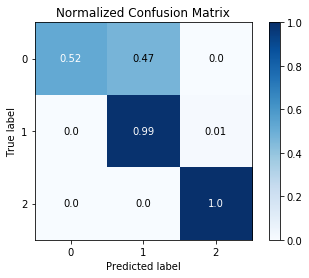

In [127]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, np.argmax(preds, axis=1), normalize=True)



In [115]:
X_train.shape

(13757, 10)